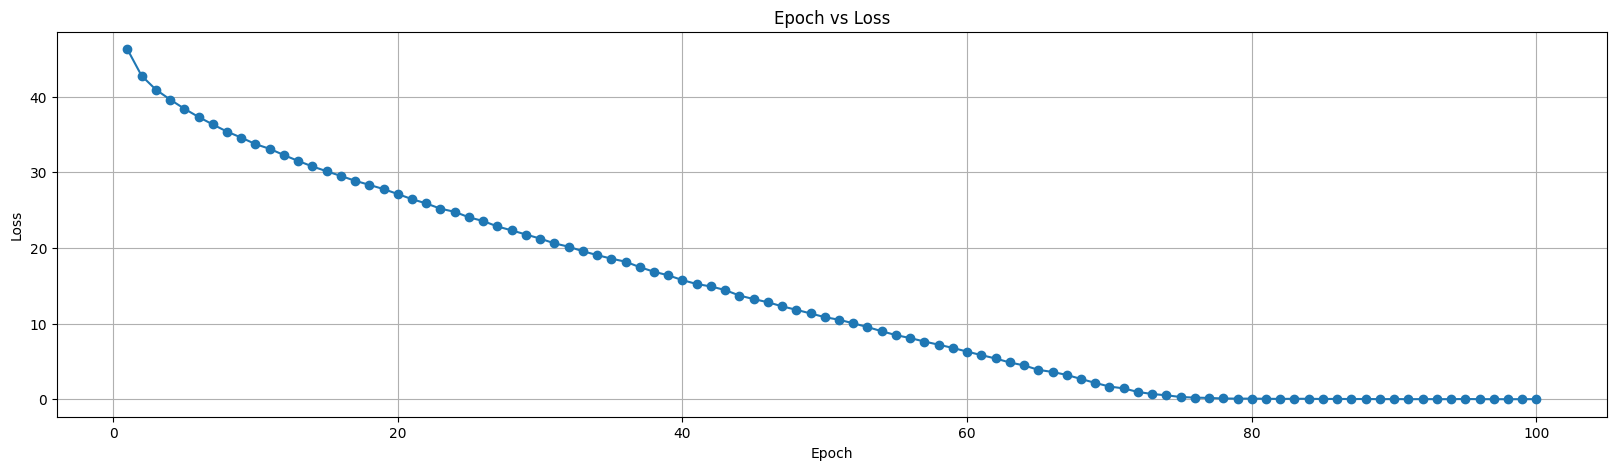

In [14]:
import matplotlib.pyplot as plt

epochs = list(range(1, 101))
losses = [
    46.278254, 42.770077, 40.945018, 39.628672, 38.416960, 37.326870, 36.333397, 35.389013, 34.593586, 33.736216,
    33.108364, 32.286392, 31.506627, 30.783794, 30.148341, 29.523119, 28.889386, 28.346939, 27.789625, 27.134031,
    26.455894, 25.889345, 25.196761, 24.780363, 24.054965, 23.564248, 22.845185, 22.331272, 21.783523, 21.243281,
    20.614033, 20.171842, 19.572727, 19.066367, 18.590066, 18.191601, 17.470898, 16.857897, 16.389843, 15.753218,
    15.236621, 14.917521, 14.439256, 13.713562, 13.249100, 12.829056, 12.287933, 11.829535, 11.349364, 10.856332,
    10.513939, 10.044648, 9.549640, 8.995086, 8.482237, 8.091331, 7.632276, 7.216859, 6.786360, 6.302615, 5.839602,
    5.391880, 4.862805, 4.479973, 3.891138, 3.610520, 3.220157, 2.685282, 2.163546, 1.685094, 1.440521, 0.967022,
    0.697158, 0.526670, 0.302562, 0.219380, 0.178123, 0.103355, 0.085977, 0.086684, 0.066870, 0.047100, 0.066472,
    0.064257, 0.038392, 0.049306, 0.030743, 0.040390, 0.015597, 0.027130, 0.010972, 0.024186, 0.013941, 0.018634,
    0.036049, 0.016536, 0.011090, 0.007512, 0.015288, 0.016592
]

# 绘制折线图
plt.figure(figsize=(20, 5))  # 设置图形的大小
plt.plot(epochs, losses, marker='o')  # 绘制带有圆圈标记的折线图
plt.title('Epoch vs Loss')  # 设置图形的标题
plt.xlabel('Epoch')  # 设置x轴的标签
plt.ylabel('Loss')  # 设置y轴的标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import numpy as np
from TransE import TransE
from TransE import Config
from load_data import PyTorchTrainDataLoader

In [2]:
#初始化模型
config = Config()
train_dataloader = PyTorchTrainDataLoader(
                            in_path = "./data/", 
                            nbatches = config.nbatches,
                            threads = 8)
    
transe = TransE(
            ent_tot = train_dataloader.get_ent_tot(),
            rel_tot = train_dataloader.get_rel_tot(),
            dim = config.hidden_size, #50
            p_norm = config.p_norm, 
            norm_flag = True,
            margin=config.margin)

In [3]:
#初始化wikidata词条与embedding序号之间的字典
ent_dic = {}
rel_dic = {}
f = open('./data/entity2id.txt','r')
next(f)
for index in range(train_dataloader.get_ent_tot()):
    value,key = f.readline().strip().split()
    ent_dic[int(key)] = value
f = open('./data/relation2id.txt','r')
next(f)
for index in range(train_dataloader.get_rel_tot()):
    value,key = f.readline().strip().split()
    rel_dic[int(key)] = value

In [4]:
#载入预训练的embedding参数
ent_data = np.loadtxt('entity2vec_margin1.txt')
rel_data = np.loadtxt('relation2vec_margin1.txt')
ent_data = torch.Tensor(ent_data)
rel_data = torch.Tensor(rel_data)
transe.ent_embeddings = transe.ent_embeddings.from_pretrained(ent_data)
transe.rel_embeddings = transe.rel_embeddings.from_pretrained(rel_data)

In [5]:
transe.ent_embeddings.weight

Parameter containing:
tensor([[ 1.4980e-03,  7.3000e-05,  1.3100e-04,  ...,  4.2400e-04,
          1.6300e-04,  3.2700e-04],
        [ 9.4770e-03, -6.1700e-04, -1.0322e-02,  ...,  9.7870e-03,
          8.3210e-03,  5.0400e-03],
        [-2.8906e-02, -9.3000e-05, -3.7026e-02,  ...,  2.1100e-04,
          4.8500e-04, -1.3220e-03],
        ...,
        [-1.3000e-05,  1.5520e-03,  3.2000e-05,  ..., -1.1334e-02,
         -1.6550e-03,  2.2000e-05],
        [-2.7000e-05,  1.4000e-05, -4.9370e-03,  ...,  1.9000e-05,
          6.7660e-03,  1.0450e-02],
        [ 8.7750e-03, -8.1330e-03, -6.9990e-03,  ...,  6.6280e-03,
         -0.0000e+00, -9.4220e-03]])

In [6]:
transe.rel_embeddings.weight

Parameter containing:
tensor([[-6.4514e-02,  1.1022e-01,  3.7873e-02,  ...,  4.0954e-02,
          1.7540e-03,  4.6698e-02],
        [ 4.7767e-02,  9.0294e-02, -1.2000e-05,  ...,  5.2598e-02,
          6.3662e-02, -2.8098e-02],
        [ 2.4515e-02, -1.8321e-02,  1.5092e-02,  ...,  4.1269e-02,
         -4.6200e-04,  1.3514e-02],
        ...,
        [-3.6629e-02, -7.1896e-02,  2.6840e-02,  ..., -6.6022e-02,
         -4.3655e-02, -1.1271e-01],
        [ 7.8148e-02, -3.2420e-02,  5.9684e-02,  ..., -1.1181e-01,
          5.3526e-02,  2.9649e-02],
        [-1.5445e-02,  2.4218e-02, -2.9010e-03,  ...,  4.7367e-02,
          1.0299e-02,  5.2378e-02]])

In [7]:
#预测Q30+P36最接近的尾实体
data = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_r':torch.LongTensor([list(rel_dic.keys())[list(rel_dic.values()).index('P36')]]),
        'batch_t':torch.LongTensor([i for i in range(train_dataloader.get_ent_tot())])}

In [8]:
score = transe.predict(data)
for index in score.argsort()[0:10]:
    print(ent_dic[index])

Q20
Q34266
Q29
Q33946
Q41304
Q33
Q35
Q403
Q148
Q34


In [9]:
score_WashingtonDC = score[list(ent_dic.keys())[list(ent_dic.values()).index('Q61')]]
score_WashingtonDC

1.6899345

In [10]:
per = (score_WashingtonDC - score.min())/(score.max()-score.min())
per

0.44240236

In [11]:
data_1 = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_t':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q49')]]),
        'batch_r':torch.LongTensor([i for i in range(train_dataloader.get_rel_tot())])}
score_1 = transe.predict(data_1)

In [12]:
for index in score_1.argsort()[0:10]:
    print(rel_dic[index])

P30
P741
P58
P790
P927
P123
P2321
P749
P186
P750
